In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import math
import networkx as nx

### Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/CA-GrQc.txt", sep="\t", comment="#", header=None, names=["source", "target"])
df

,source,target
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931
...,...,...
28975,10154,9224
28976,10154,16830
28977,11113,21723
28978,11113,23836


### Constructing the graph by defining its nodes and edges

In [5]:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['source'], row['target'])

In [6]:
print('Number of Nodes: ',G.number_of_nodes())
print('Number of Edges: ',G.number_of_edges())
print('Shape: ',df.shape)
print('Is Directed: ',G.is_directed())

Number of Nodes:  5242
Number of Edges:  28980
Shape:  (28980, 2)
Is Directed:  True


### PageRank

In [7]:
pagerank_scores = nx.pagerank(G, alpha=0.85)
# Sorting the PageRank scores in descending order and selecting the top 10 nodes
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_nodes = pd.DataFrame(top_nodes, columns=["Node", "pagerank"])
print(df_top_nodes)

    Node  pagerank
0  14265  0.001449
1  13801  0.001342
2  13929  0.001305
3   9572  0.001173
4   2710  0.001153
5  21281  0.001153
6   7689  0.001096
7  22691  0.001082
8   6264  0.001071
9  21012  0.001069


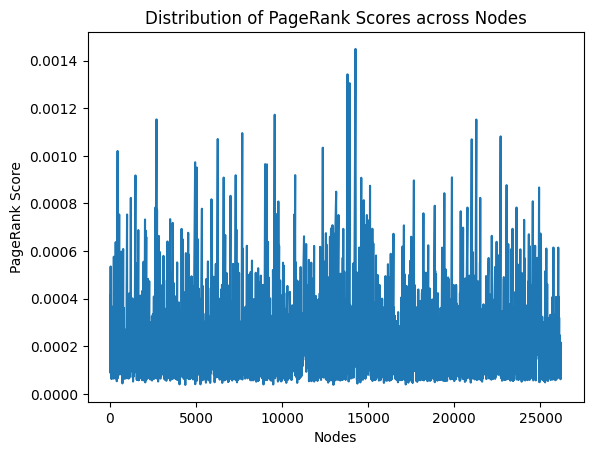

In [8]:
pagerank_scores = sorted(nx.pagerank(G, alpha=0.85).items())
x = [node for node, score in pagerank_scores]
y = [score for node, score in pagerank_scores]
plt.plot(x, y)
plt.xlabel("Nodes")
plt.ylabel("PageRank Score")
plt.title("Distribution of PageRank Scores across Nodes")
plt.show()

### Hits

In [9]:
hub,auth = nx.hits(G)
# Sorting the hub scores in descending order and selecting the top 10 nodes
top_nodes_hub = sorted(hub.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_nodes_hub = pd.DataFrame(top_nodes_hub, columns=["Node", "hub_SCORE"])
print(df_top_nodes_hub)

    Node  hub_SCORE
0  21012   0.018433
1   2741   0.018197
2  12365   0.018138
3  21508   0.017915
4   9785   0.017881
5  15003   0.017822
6  25346   0.017664
7   7956   0.017663
8  14807   0.017656
9  12781   0.017641


In [10]:
# Sorting the auth scores in descending order and selecting the top 10 nodes
top_nodes_auth = sorted(auth.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_nodes_auth = pd.DataFrame(top_nodes_auth, columns=["Node", "auth_SCORE"])
print(df_top_nodes_auth)

    Node  auth_SCORE
0  21012    0.018433
1   2741    0.018197
2  12365    0.018138
3  21508    0.017915
4   9785    0.017881
5  15003    0.017822
6  25346    0.017664
7   7956    0.017663
8  14807    0.017656
9  12781    0.017641


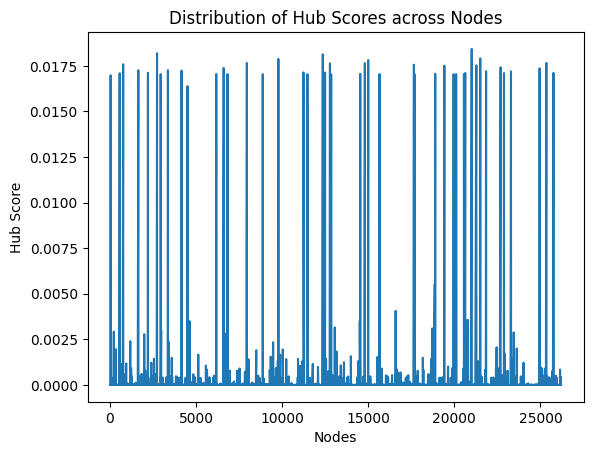

In [11]:
hub_scores = sorted(hub.items())
x = [node for node, score in hub_scores]
y = [score for node, score in hub_scores]
plt.plot(x, y)
plt.xlabel("Nodes")
plt.ylabel("Hub Score")
plt.title("Distribution of Hub Scores across Nodes")
plt.show()

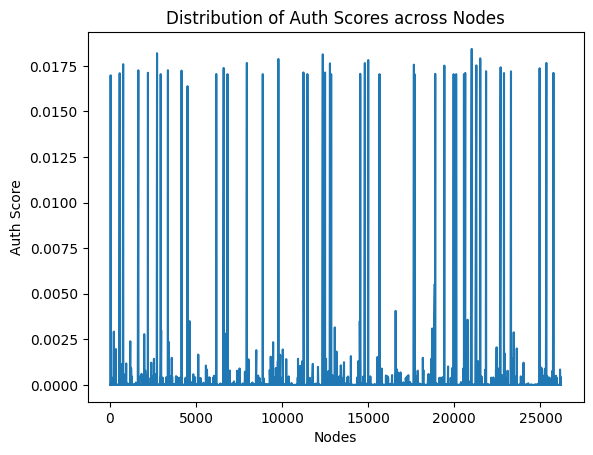

In [12]:
auth_scores = sorted(auth.items())
x = [node for node, score in auth_scores]
y = [score for node, score in auth_scores]
plt.plot(x, y)
plt.xlabel("Nodes")
plt.ylabel("Auth Score")
plt.title("Distribution of Auth Scores across Nodes")
plt.show()